In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
caminho_arquivo = "../data/raw/data_sprint_2025/shape_muni.gpkg"

Arquivo carregado com sucesso!
🔹 Dimensões: (5570, 5) (Linhas x Colunas)
------------------------------
Colunas encontradas:
['geocode', 'geocode_name', 'uf', 'uf_code', 'geometry']
------------------------------
Amostra dos dados:
   geocode           geocode_name  uf  uf_code  \
0  1100015  Alta Floresta D'oeste  RO       11   
1  1100023              Ariquemes  RO       11   
2  1100031                 Cabixi  RO       11   
3  1100049                 Cacoal  RO       11   
4  1100056             Cerejeiras  RO       11   

                                            geometry  
0  MULTIPOLYGON (((-61.96836 -12.13407, -61.96827...  
1  MULTIPOLYGON (((-63.18282 -10.13892, -63.18615...  
2  MULTIPOLYGON (((-60.70518 -13.32474, -60.70904...  
3  MULTIPOLYGON (((-61.3474 -11.50562, -61.34569 ...  
4  MULTIPOLYGON (((-60.82417 -13.11156, -60.82289...  


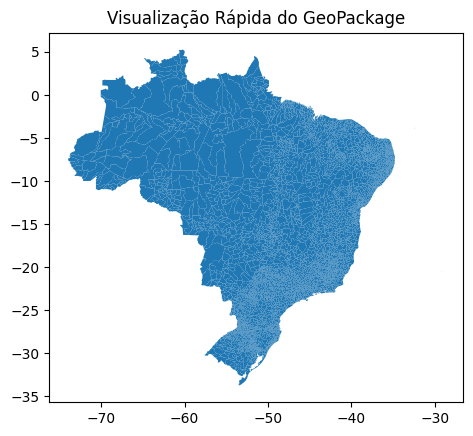

In [19]:
try:
    gdf = gpd.read_file(caminho_arquivo)

    print("Arquivo carregado com sucesso!")
    print(f"🔹 Dimensões: {gdf.shape} (Linhas x Colunas)")
    print("-" * 30)

    print("Colunas encontradas:")
    print(gdf.columns.tolist())
    print("-" * 30)

    print("Amostra dos dados:")
    print(gdf.head())

    gdf.plot()
    plt.title("Visualização Rápida do GeoPackage")
    plt.show()

except Exception as e:
    print(f"Erro ao abrir o arquivo: {e}")

In [20]:
vizinhos = gpd.sjoin(gdf, gdf, predicate='touches', how='inner')

In [21]:
vizinhos = vizinhos[vizinhos['geocode_left'] != vizinhos['geocode_right']]

In [22]:
df_edges = pd.DataFrame({
    'source_geocode': vizinhos['geocode_left'],
    'target_geocode': vizinhos['geocode_right']
})

In [23]:
degree = df_edges.groupby('source_geocode').size().reset_index(name='num_neighbors')

In [24]:
static_features = gdf[['geocode', 'geocode_name', 'uf', 'uf_code']].copy()

In [25]:
static_features = static_features.merge(degree, left_on='geocode', right_on='source_geocode', how='left')

In [26]:
static_features['num_neighbors'] = static_features['num_neighbors'].fillna(0).astype(int)

In [27]:
static_features.to_csv("../data/processed/static_features_tft.csv", index=False)
df_edges.to_csv("../data/processed/adjacencia_edges.csv", index=False)

print("Arquivos gerados com sucesso!")

Arquivos gerados com sucesso!


In [28]:
display(static_features.head())

,geocode,geocode_name,uf,uf_code,source_geocode,num_neighbors
0,1100015,Alta Floresta D'oeste,RO,11,1100015.0,2
1,1100023,Ariquemes,RO,11,1100023.0,3
2,1100031,Cabixi,RO,11,NaN,0
3,1100049,Cacoal,RO,11,1100049.0,3
4,1100056,Cerejeiras,RO,11,NaN,0


In [30]:
display(df_edges.head())

,source_geocode,target_geocode
0,1100015,1100296
0,1100015,1100288
1,1100023,1100601
1,1100023,1100452
1,1100023,1100403
